In [1]:
import sympy as sp

In [2]:
sp.var('x');

In [3]:
E = 207e9
domain = (x, 0, 0.315)

In [4]:
d = sp.Piecewise(
  (0.035, x < 0.04),
  (0.04, x < 0.1),
  (0.045, x < 0.21),
  (0.04, x < 0.275),
  (0.035, True),
)
d

Piecewise((0.035, x < 0.04), (0.04, x < 0.1), (0.045, x < 0.21), (0.04, x < 0.275), (0.035, True))

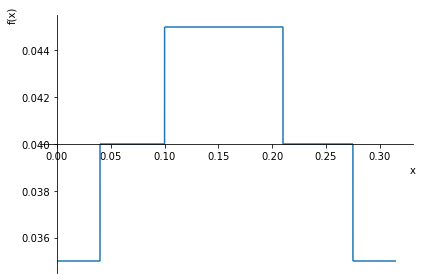

In [5]:
sp.plot(d, (x, 0, 0.315));

In [6]:
I = sp.pi * d**4 / 64
I

pi*Piecewise((1.500625e-6, x < 0.04), (2.56e-6, x < 0.1), (4.100625e-6, x < 0.21), (2.56e-6, x < 0.275), (1.500625e-6, True))/64

In [7]:
I.n().simplify()

Piecewise((7.36617574342685e-8, x < 0.04), (1.25663706143592e-7, x < 0.1), (2.01288958986354e-7, x < 0.21), (1.25663706143592e-7, x < 0.275), (7.36617574342685e-8, True))

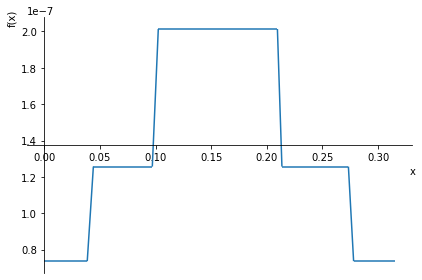

In [8]:
sp.plot(I, (x, 0, 0.315));

In [9]:
M = sp.Piecewise(
  (3889 * x, x < 0.14),
  (980 - 3111 * x, True),
)
M

Piecewise((3889*x, x < 0.14), (980 - 3111*x, True))

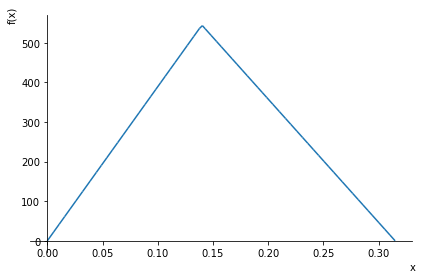

In [10]:
sp.plot(M, (x, 0, 0.315));

In [11]:
sp.var("C1 C2")
intrim = sp.integrate(sp.integrate(M / (E * I), x) + C1, x) + C2
intrim

C2 + Piecewise((1.0*C1*x + 0.133543927282044*x**3/pi, x < 0.04), (0.04*C1 + 0.078280998389694*x**3/pi + 1.0*x*(1.0*pi*C1 + 0.000265262058683278)/pi - 0.04*(1.0*pi*C1 + 0.000265262058683278)/pi + 3.53682744911037e-6/pi, x < 0.1), (0.04*C1 + 0.0488704419149805*x**3/pi + 1.0*x*(1.0*pi*C1 + 0.00114757875292469)/pi + 0.06*(1.0*pi*C1 + 0.000265262058683278)/pi - 0.1*(1.0*pi*C1 + 0.00114757875292469)/pi + 3.29473839238239e-5/pi, x < 0.14), (0.04*C1 - 0.0390938402667792*x**3/pi + 0.0369449985163391*x**2/pi + 1.0*x*(1.0*pi*C1 - 0.00402472103936278)/pi - 0.14*(1.0*pi*C1 - 0.00402472103936278)/pi + 0.06*(1.0*pi*C1 + 0.000265262058683278)/pi + 0.04*(1.0*pi*C1 + 0.00114757875292469)/pi - 0.000449800596689673/pi, x < 0.21), (0.04*C1 - 0.0626207729468599*x**3/pi + 0.0591787439613527*x**2/pi + 1.0*x*(1.0*pi*C1 - 0.0102502809326938)/pi - 0.21*(1.0*pi*C1 - 0.0102502809326938)/pi + 0.07*(1.0*pi*C1 - 0.00402472103936278)/pi + 0.06*(1.0*pi*C1 + 0.000265262058683278)/pi + 0.04*(1.0*pi*C1 + 0.001147578752924

In [12]:
sols = sp.solve((
  intrim.subs(x, 0),
  intrim.subs(x, 0.315),
))
sols

{C1: -0.00142662228772857, C2: 0.0}

In [13]:
y = intrim.subs(sols).simplify()
y

Piecewise((0.133543927282044*x**3/pi - 0.00142662228772857*x, x < 0.04), ((0.078280998389694*x**3 + 1.0*x*(0.000265262058683278 - 0.00142662228772857*pi) - 7.07365489822074e-6)/pi, x < 0.1), ((0.0488704419149805*x**3 + 1.0*x*(0.00114757875292469 - 0.00142662228772857*pi) - 6.58947678476479e-5 + 6.7762635780344e-21*pi)/pi, x < 0.14), ((-0.0390938402667792*x**3 + 0.0369449985163391*x**2 - 1.0*x*(0.00402472103936278 + 0.00142662228772857*pi) + 1.35525271560688e-20*pi + 0.000175479222459101)/pi, x < 0.21), ((-0.0626207729468599*x**3 + 0.0591787439613527*x**2 - 1.0*x*(0.00142662228772857*pi + 0.0102502809326938) - 6.7762635780344e-21*pi + 0.000720221549483745)/pi, x < 0.275), ((-0.106828274048454*x**3 + 0.100956324558809*x**2 - 1.0*x*(0.00142662228772857*pi + 0.0231983734488706) - 6.7762635780344e-21*pi + 0.00204089533322195)/pi, True))

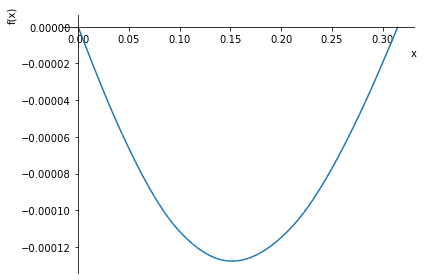

In [14]:
sp.plot(y, (x, 0, 0.315));

In [15]:
yp = sp.diff(y, x)
yp

Piecewise((0.400631781846131*x**2/pi - 0.00142662228772857, x < 0.04), ((0.234842995169082*x**2 - 0.00142662228772857*pi + 0.000265262058683278)/pi, x < 0.1), ((0.146611325744941*x**2 - 0.00142662228772857*pi + 0.00114757875292469)/pi, x < 0.14), ((-0.117281520800338*x**2 + 0.0738899970326781*x - 0.00142662228772857*pi - 0.00402472103936278)/pi, x < 0.21), ((-0.18786231884058*x**2 + 0.118357487922705*x - 0.0102502809326938 - 0.00142662228772857*pi)/pi, x < 0.275), ((-0.320484822145362*x**2 + 0.201912649117618*x - 0.0231983734488706 - 0.00142662228772857*pi)/pi, True))

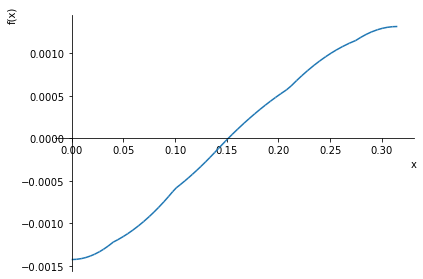

In [16]:
sp.plot(yp, (x, 0, 0.315));

In [17]:
yp.subs(x, 0).n()

-0.00142662228772857

In [18]:
yp.subs(x, 0.14).n()

-0.000146647071040092

In [19]:
yp.subs(x, 0.315).n()

0.00131211741997159